# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import random_forest_method

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from pandas_to_latex.ipynb
Importing Jupyter notebook from multiscorer.ipynb


/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mortenolsenosvik/anaconda3/lib/python3.7/s

Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [2]:
import pandas_to_latex

In [3]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

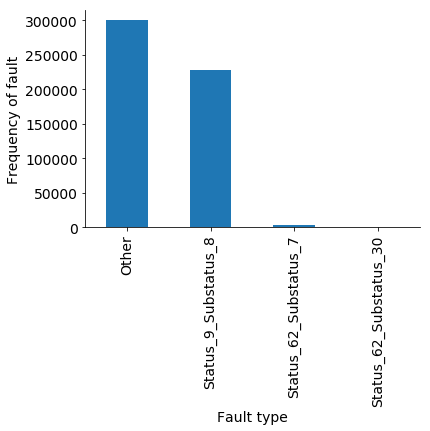

<Figure size 1440x1152 with 0 Axes>

In [4]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [5]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [6]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,10000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,10000,"Status_9_Substatus_8")

In [7]:
print(undersampled_data['Status'].value_counts())

Status_9_Substatus_8      10000
Other                     10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64


# REMOVE THE CELL UNDER; THIS IS JUST FOR TESTING

In [8]:
'''
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")
'''

'\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")\n'

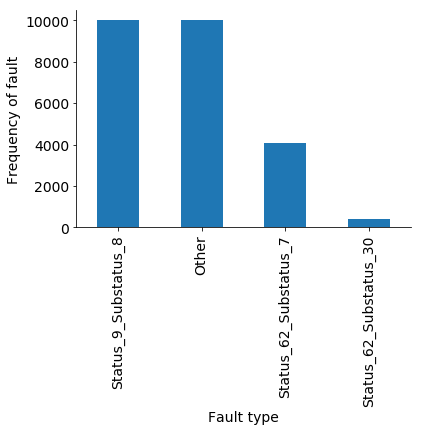

<Figure size 1440x1152 with 0 Axes>

In [9]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [10]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,24-07-2018 14:20:30,-149.5,6.1,0.100000,175.0,0.0,16.0,17.0,17.0,23.0,...,18.0,28.0,19.0,19.0,22.0,29.0,42.0,91.989998,25.500000,Other
1,31-01-2018 11:28:30,-3.0,19.5,21.129999,128.0,2361.0,26.0,35.0,28.0,12.0,...,42.0,16.0,32.0,2.0,27.0,30.0,71.0,17.750000,125.000000,Status_9_Substatus_8
2,01-10-2018 14:31:30,-2.3,7.3,13.840000,284.0,369.0,15.0,27.0,27.0,23.0,...,46.0,38.0,49.0,8.0,17.0,20.0,33.0,6.000000,281.700012,Status_9_Substatus_8
3,20-12-2017 10:12:00,-12.8,2.6,6.360000,253.0,0.0,9.0,18.0,18.0,12.0,...,28.0,23.0,22.0,5.0,8.0,13.0,30.0,1.000000,240.199997,Status_9_Substatus_8
4,25-08-2019 06:14:30,9.6,5.2,12.160000,189.0,0.0,30.0,38.0,35.0,33.0,...,67.0,44.0,49.0,16.0,25.0,28.0,39.0,8.880000,198.600006,Status_9_Substatus_8


In [11]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(24481,)

In [12]:
y.value_counts()

Status_9_Substatus_8      10000
Other                     10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

## SMOTE (BEFORE RANDOM FOREST)

In [13]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_smote ,y_smote = sm.fit_resample(X, y)

'''
X_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)
'''

'\nX_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)\n'

## Random forest and feature importance

In [14]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=10, random_state=12)

# Smote is on the cross validation
df_rf, y_true, y_pred = performance_measure.cross_validate_model(rf,X,y,smote=True)
performance_measure.confusion_matrix(y_true,y_pred)

# rf = random_forest_method.get_rf_model(pd.DataFrame(X_train_smote1,columns=X_train.columns), pd.DataFrame(X_test_smote1,columns=X_train.columns), y_train_smote1, y_test_smote1)
# rf1 = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

# Combine training and test data for cross validation:

rf.fit(X_smote,y_smote)

columns = X.columns
feature_importances = random_forest_method.get_feature_importances(rf, columns)
feature_importances.head()

The avg accc is:  0.9808010691668972

\begin{tabular}{lll}
\toprule
precision &   recall &    f1\_avg \\
\midrule
 0.965396 &  0.98009 &  0.972151 \\
\bottomrule
\end{tabular}



,importance
Log-T-Raw-TransformerTemperature,0.084364
Log-T-Raw-Rectifier1HeatSink,0.065357
Log-T-Raw-Stator1Temperature,0.053114
Log-T-Raw-Rotor2Temperature,0.052160
Log-T-Raw-Stator2Temperature,0.049261


In [15]:
pandas_to_latex.df_to_latex(feature_importances.head())


\begin{tabular}{r}
\toprule
 importance \\
\midrule
   0.084364 \\
   0.065357 \\
   0.053114 \\
   0.052160 \\
   0.049261 \\
\bottomrule
\end{tabular}



## SVM

### Split data for LIME

In [16]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)
columns_for_data = X_train.columns
y_train.value_counts()
y_test.value_counts()

Other                     3300
Status_9_Substatus_8      3300
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

### Scale data set for SVM

In [17]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

# Scale the whole dataset first
scaler_whole  = MinMaxScaler()
X_scaled = scaler_whole.fit_transform(X)

# Scale the SMOTE data set:
scaler_whole_smote  = MinMaxScaler()
X_scaled_oversampled = scaler_whole_smote.fit_transform(X_scaled)

# Scale the train and test, for use with LIME

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()

(16402, 34)
(8079, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.510281,0.132948,0.462430,0.445682,0.064583,0.640000,0.741176,0.6875,0.649351,0.680000,...,0.612903,0.6875,0.692308,0.365591,0.428571,0.545455,0.395833,0.505263,0.00000,0.587124
1,0.478425,0.228324,0.609274,0.298050,0.164167,0.640000,0.705882,0.7375,0.753247,0.760000,...,0.591398,0.6875,0.711538,0.516129,0.530612,0.610390,0.437500,0.357895,0.00000,0.454206
2,0.500724,0.358381,0.840275,0.718663,0.665833,0.906667,1.000000,0.6875,0.610390,0.640000,...,0.688172,0.8125,0.403846,0.387097,0.571429,0.818182,0.687500,0.873684,0.04883,0.783801
3,0.480741,0.254335,0.731215,0.721448,0.281250,0.733333,0.764706,0.8000,0.610390,0.653333,...,0.677419,0.7875,0.634615,0.494624,0.571429,0.701299,0.583333,0.652632,0.00000,0.771547
4,0.489429,0.130058,0.437527,0.348189,0.057083,0.480000,0.552941,0.5875,0.506494,0.520000,...,0.698925,0.7750,0.500000,0.279570,0.142857,0.363636,0.000000,0.252632,0.00000,0.499481


In [18]:
# Printing the 5 first columns and 5 first rows for the thesis
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

# The scaled set looks like this
pandas_to_latex.df_to_latex(head_row_col(X_train_scaled_df))


\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.132948 &    0.462430 &          0.445682 &     0.064583 &             0.640000 &  ... \\
  0.228324 &    0.609274 &          0.298050 &     0.164167 &             0.640000 &  ... \\
  0.358381 &    0.840275 &          0.718663 &     0.665833 &             0.906667 &  ... \\
  0.254335 &    0.731215 &          0.721448 &     0.281250 &             0.733333 &  ... \\
  0.130058 &    0.437527 &          0.348189 &     0.057083 &             0.480000 &  ... \\
\bottomrule
\end{tabular}



## SMOTE for training and test data

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote, y_test_smote = sm.fit_resample(X_test_scaled, y_test)

## SVM method

In [20]:
from sklearn.svm import SVC

### BALANCED SVM

In [ ]:
# Balanced
svm_balanced = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')
df_svm_balanced, y_true_svm_balanced, y_pred_svm_balanced = performance_measure.cross_validate_model(svm_balanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_balanced,y_pred_svm_balanced,normalize=True)

# svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

In [ ]:
# Unbalanced
svm_unbalanced = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced, y_true_svm_unbalanced, y_pred_svm_unbalanced = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced,y_pred_svm_unbalanced,normalize=True)

# svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED AND SMOTE SVM (USE THIS RESULT Best results for 62_30)!

In [ ]:
svm_unbalanced_smote = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced_smote, y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced_smote,y_pred_svm_unbalanced_smote,normalize=True)

# svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [ ]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)

In [ ]:
svm_balanced_smote = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')

df_svm_balanced_smote, y_true_svm_balanced_smote, y_pred_svm_balanced_smote = performance_measure.cross_validate_model(svm_balanced_smote,X_scaled_oversampled,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_svm_balanced_smote,y_pred_svm_balanced_smote,normalize=True)

# balanced with smote and undersampling
# svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## Decision tree model

### Remove the features from the random forest model called rf


In [ ]:
# rf_df = pd.DataFrame(feature_importances)
rf_df = feature_importances

rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

### Convert the selected DT variables to LATEX

In [ ]:
# Print to latex
pandas_to_latex.df_to_latex(df_selected_features)

In [ ]:
# Make the feature names more readable by removing "LOG-" etc.
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])
shorter_feature_names

### Evaluate Decision tree model

#### Setting depth for tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DEPTH = 3

In [ ]:
X_dt = X[include_features.tolist()]
clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)

df_dt, y_true_dt, y_pred_dt = performance_measure.cross_validate_model(clf_df,X_dt,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_dt,y_pred_dt,normalize=True)


In [ ]:
import numpy as np

# Training the DT with the SMOTE data (all of it)

X_smote_with_names = (pd.DataFrame(X_smote))
X_smote_with_names.columns = columns_for_data


# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_smote_filtered = X_smote_with_names[include_features.tolist()]

# Printing df
X_smote_filtered.head()

In [ ]:
col_rename_dict = {i:j for i,j in zip(X_smote_filtered.columns,shorter_feature_names)}
X_smote_filtered.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_smote_filtered.head()

### Training the DT

In [ ]:
# Train DT on these features and print it out:

clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)
clf_df.fit(X_smote_filtered,y_smote)


# dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
# dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

In [ ]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_smote_filtered.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))

In [ ]:
save_tree(clf_df,"depth3")
# save_tree(dt_depth3,"depth3")